In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


from tqdm import tqdm
import wandb
from PIL import Image


from dataset import DatasetCelebA
from network import CNN
import pandas as pd
import icecream as ic
import cv2


e:\Programe\Anaconda\envs\Pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Male


Text(0.5, 1.0, 'Real : Male  Predicted: Male')

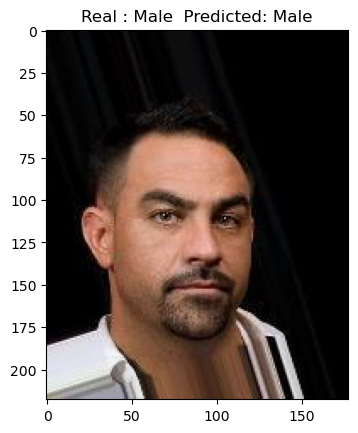

In [7]:
excel_name = "E:\Lucru\Dizertatie\Cod\gender-recognition\CelebA\celebA_onlyGender_100_test.xlsx"
base_path = "E:\Lucru\Dizertatie\Cod\ConditionalGAN_onlyGender\CelebA\\img_align_celeba\\"

image_shape = [3,128,128]

model = CNN(2, image_shape)
model.load_state_dict(torch.load('.\\checkpoints\\model.pt'))
model.eval()

transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([128,128]),
        transforms.ToTensor()])

df = pd.read_excel(excel_name)

base_path = base_path
data = df["image_id"]
labels = df["Male"]

index = 22

poza_teodora = "E:\Documente Importante\\Vaman_Teodora.jpg"

test_image = cv2.imread(base_path + data[index])
# test_image = cv2.imread(poza_teodora)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
input_image = transform(test_image)
input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

test_image_label = "Male" if labels[index] == 1 else "Female" 
output = model.forward(input_image)
predicted_label = np.argmax(output.detach().numpy(), axis=1)
test_image_predicted_label = "Male" if predicted_label == 1 else "Female" 
print(test_image_predicted_label)

plt.figure()
plt.imshow(test_image)
plt.title("Real : {}  Predicted: {}".format(test_image_label, test_image_predicted_label))